# Customer Segmentation with K-Means Clustering

##### Content

This data set is created only for the learning purpose of the customer segmentation concepts, also known as market basket analysis. I will demonstrate this by using unsupervised Machine Learning technique (K-Means Clustering Algorithm) in the simplest form.

##### Context

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income, and spending score.

Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

You own the mall and want to understand the customers like who can be easily converge Target Customers so that the sense can be given to marketing team and plan the strategy accordingly.

Before we go further, I'd like to tell you that I got the dataset from <a href="https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python">here</a>.

### Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [89]:
# Read the dataset

df = pd.read_csv("Mall_Customers.csv")

In [90]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [106]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster'],
      dtype='object')

### Column Definition

From here we know what these columns represent:
- `CustomerID` represents Unique ID assigned to the customer.
- `Gender` represents Gender of the customer.
- `Age` represents Age of the customer.
- `Annual Income` represents Annual Income of the customer.
- `Spending Score` represents Annual Income of the customer.

In [91]:
# Dealing with missing values

df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [92]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [86]:
df.Gender = df.Gender.apply(lambda x: 0 if x == 'Female' else 1)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [87]:
df.drop(columns = 'CustomerID', inplace = True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


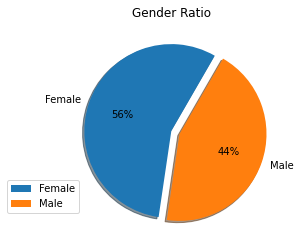

In [149]:
# Gender Ratio

plt.pie(df.Gender.value_counts(),
        labels = df.Gender.value_counts().index,
        explode = [0, 0.1],
        autopct = '%1.0f%%', 
        startangle = 60,
        shadow = True)
plt.title('Gender Ratio')
plt.legend(frameon = True, bbox_to_anchor = (0.1, 0.3))
plt.show()

In [72]:
# Use this code below if you want to use plotly

# px.pie(df.Gender.value_counts(),
#       title = 'Gender Ratio',
#       values = 'Gender',
#       names = ['Female', 'Male'],
#       hole = 0.4)

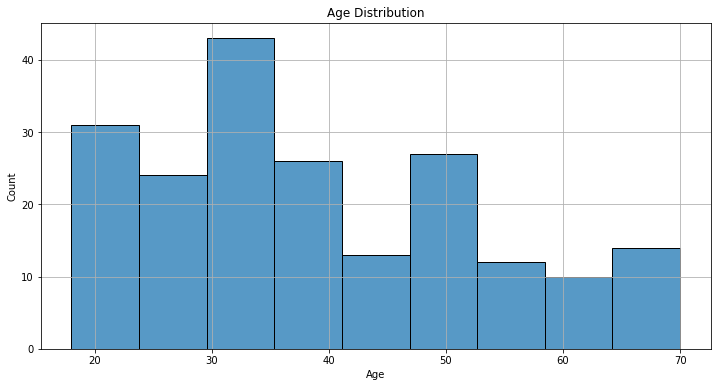

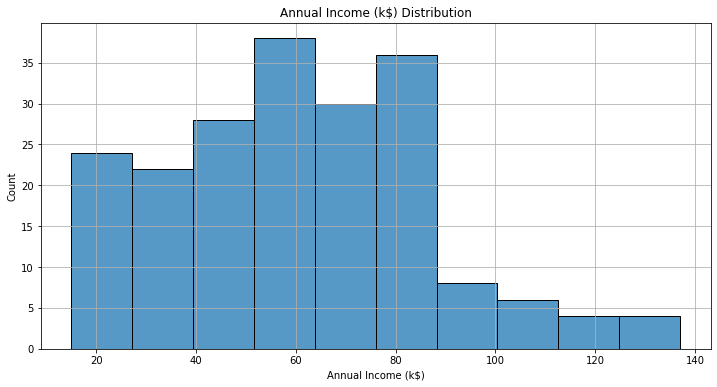

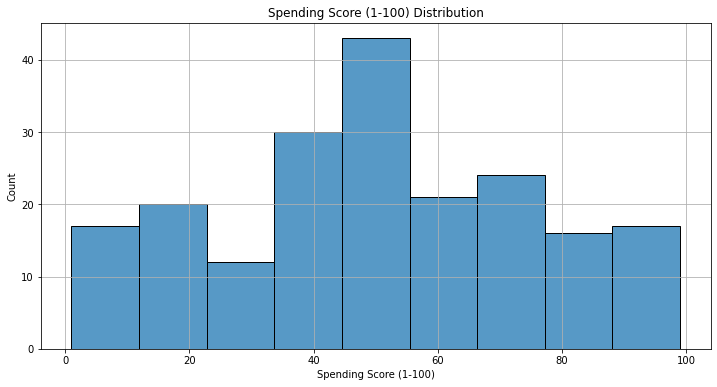

In [73]:
# Looking for data distribution

for i in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    plt.figure(figsize = (12, 6))
    sns.histplot(df[i])
    plt.title(f"{i} Distribution")
    plt.grid()
    plt.show()

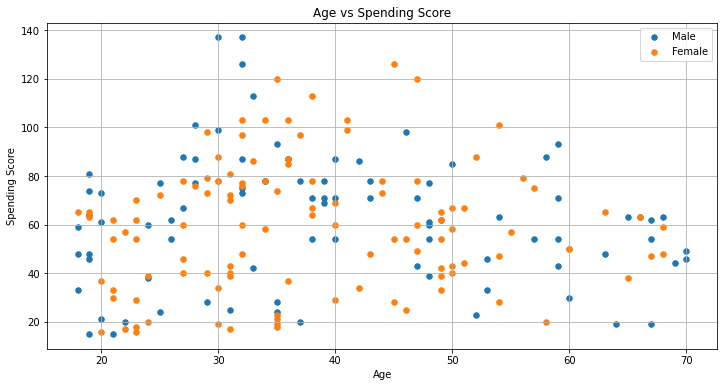

In [141]:
plt.figure(figsize = (12, 6))
plt.scatter(df['Age'][df['Gender'] == 'Male'], df['Annual Income (k$)'][df['Gender'] == 'Male'], s = 30, label = 'Male')
plt.scatter(df['Age'][df['Gender'] == 'Female'], df['Annual Income (k$)'][df['Gender'] == 'Female'], s = 30, label = 'Female')
plt.grid()
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs Spending Score')
plt.legend()
plt.show()

In [85]:
# Use this code below if you want to use plotly

# px.scatter(df, x = 'Age', y = 'Annual Income (k$)', color = 'Gender', title = 'Age vs Annual Income')

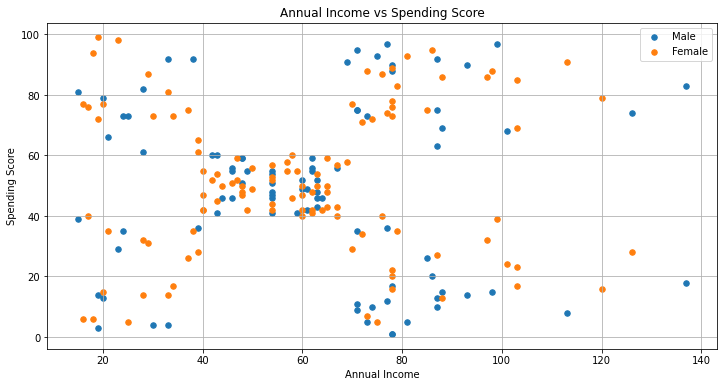

In [140]:
plt.figure(figsize = (12, 6))
plt.scatter(df['Annual Income (k$)'][df['Gender'] == 'Male'], df['Spending Score (1-100)'][df['Gender'] == 'Male'], s = 30, label = 'Male')
plt.scatter(df['Annual Income (k$)'][df['Gender'] == 'Female'], df['Spending Score (1-100)'][df['Gender'] == 'Female'], s = 30, label = 'Female')
plt.grid()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Annual Income vs Spending Score')
plt.legend()
plt.show()

In [93]:
# Use this code below if you want to use plotly

# px.scatter(df, 
#           x = 'Annual Income (k$)', 
#           y = 'Spending Score (1-100)', 
#           color = 'Gender', 
#           title = 'Annual Income vs Spending Score')

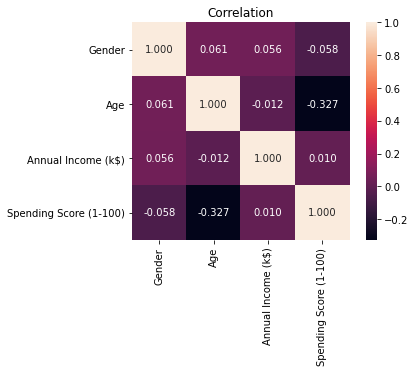

In [60]:
# Looking for correlation

sns.heatmap(df.corr(), fmt = '0.3f', annot = True, square = True)
plt.title("Correlation")
plt.show()

### Data Pre-Processing

The idea behind `StandardScaler` is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. In case of multivariate data, this is done feature-wise (in other words independently for each column of the data).

In [61]:
scaler = StandardScaler()
x = scaler.fit_transform(df)

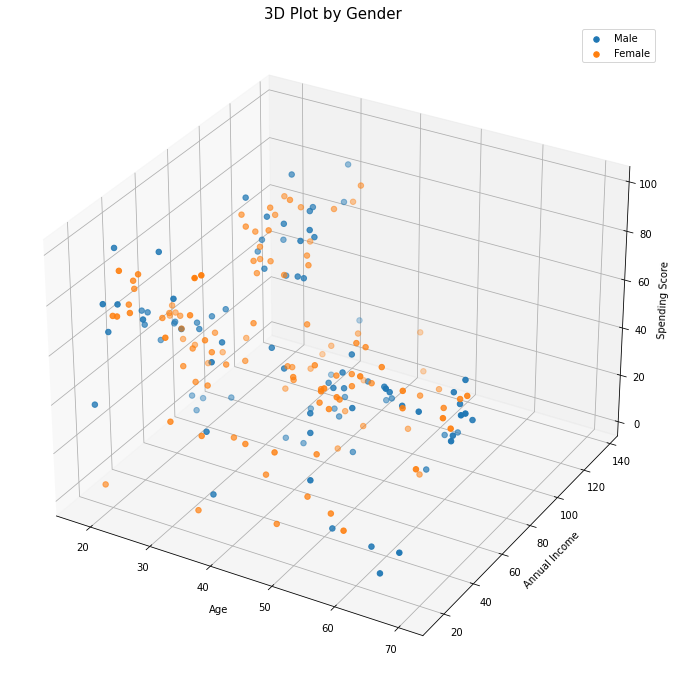

In [138]:
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(df['Age'][df['Gender'] == 'Male'], df['Annual Income (k$)'][df['Gender'] == 'Male'], df['Spending Score (1-100)'][df['Gender'] == 'Male'], s = 30, label = 'Male')
ax.scatter(df['Age'][df['Gender'] == 'Female'], df['Annual Income (k$)'][df['Gender'] == 'Female'], df['Spending Score (1-100)'][df['Gender'] == 'Female'], s = 30, label = 'Female')

ax.set_title('3D Plot by Gender', fontsize = 15)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
ax.legend()
plt.show()

In [62]:
# Use this code below if you want to use plotly

# px.scatter_3d(x = x[:, 1], 
#              y = x[:, 2], 
#              z = x[:, 3], 
#              color = x[:, 0],
#              title = '3D Plot by Gender',
#              labels = {'x': 'Age',
#                        'y': 'Annual Income',
#                        'z': 'Spending Score'})

In [63]:
# Deleting Gender Column for Visualization Purpose

x = x[:, 1:4]

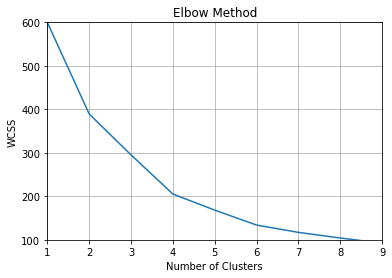

In [64]:
WCSS = []
for k in range(1, 10):
    model = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    model.fit(x)
    WCSS.append(model.inertia_)
    
plt.plot(range(1, 10), WCSS)
plt.axis([1, 9, 100, 600])
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid()
plt.show()

From the Elbow Method, we use K = 6 for clustering.

In [108]:
model = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
model.fit(x)
cluster_predict = model.fit_predict(x)

print(f"Silhouette Score: {silhouette_score(x, cluster_predict).round(3)}.")


# Use this code below if you want to use plotly

# px.scatter_3d(x = x[:, 0], 
#              y = x[:, 1], 
#              z = x[:, 2], 
#              color = cluster_predict,
#              title = '3D Plot by Cluster',
#              labels = {'x': 'Age',
#                        'y': 'Annual Income',
#                        'z': 'Spending Score'})

Silhouette Score: 0.427.


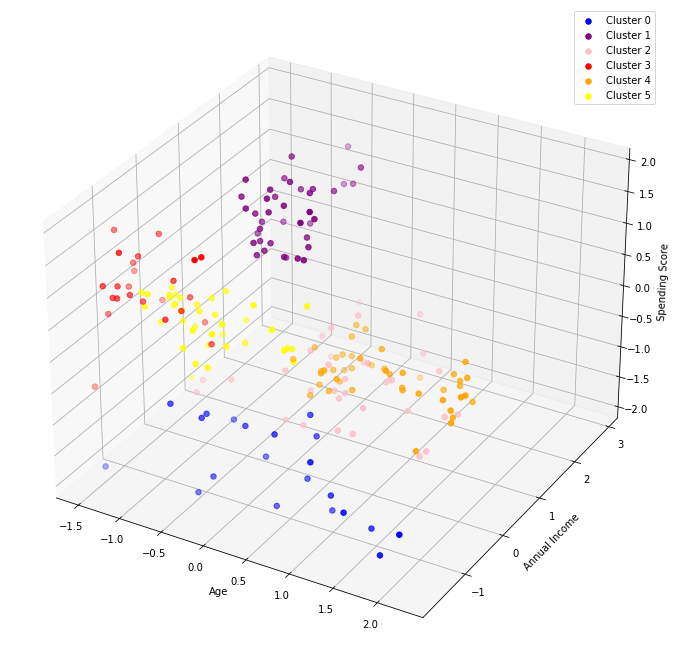

In [118]:
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(x[cluster_predict == 0, 0], x[cluster_predict == 0, 1], x[cluster_predict == 0, 2], s = 30, color = 'blue', label = 'Cluster 0')
ax.scatter(x[cluster_predict == 1, 0], x[cluster_predict == 1, 1], x[cluster_predict == 1, 2], s = 30, color = 'purple', label = 'Cluster 1')
ax.scatter(x[cluster_predict == 2, 0], x[cluster_predict == 2, 1], x[cluster_predict == 2, 2], s = 30, color = 'pink', label = 'Cluster 2')
ax.scatter(x[cluster_predict == 3, 0], x[cluster_predict == 3, 1], x[cluster_predict == 3, 2], s = 30, color = 'red', label = 'Cluster 3')
ax.scatter(x[cluster_predict == 4, 0], x[cluster_predict == 4, 1], x[cluster_predict == 4, 2], s = 30, color = 'orange', label = 'Cluster 4')
ax.scatter(x[cluster_predict == 5, 0], x[cluster_predict == 5, 1], x[cluster_predict == 5, 2], s = 30, color = 'yellow', label = 'Cluster 5')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
ax.legend()

### Conclusion

From the visualization above, we can cluster the customers into six categories:

- Cluster 0 (Blue): Customer with low Annual Income and low Spending Score
- Cluster 1 (Purple): Customer with high Annual Income and high Spending Score
- Cluster 2 (Pink): Customer with high Annual Income and low Spending Score
- Cluster 3 (Red): Customer with low Annual Income and high Spending Score with young Age.
- Cluster 4 (Orange): Customer with normal Annual Income and normal Spending Score with high Age.
- Cluster 5 (Yellow): Customer with normal Annual Income and normal Spending Score with young Age.

We can target Cluster 1 as our main target because they had a lot of annual income and also spend a lot. We can send them an email once a week. For the other cluster, we can send them emails once a month.